# Try to understand Central Limit Theorem

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
replication_count = 1000
n_start = 1000
n_stop = 10001
n_step = 1000
# ME = 0
# DE = 1
sample_size_array = np.arange(n_start, n_stop, n_step)
count_rows = len(sample_size_array)
count_colums = replication_count

In [3]:
sample_sum_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)      # sum(sample)
sample_bar_n_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)    # sum(sample) / n
sample_sum_sqrt_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN) # sum(sample) / n^(1/2)
sample_sum_2_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)    # sum(sample) / n^2
CLT_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)             # Central limit Theorem 
for row, n in enumerate(sample_size_array):
    for i in range(0, replication_count):
        sample = np.random.binomial(n = 1, p = 1/2, size = n) # normal(ME, DE, size = n) 
        
        sample_sum_matrix[row][i] = np.sum(sample)
        sample_bar_n_matrix[row, i] = np.sum(sample) / n
        sample_sum_2_matrix[row, i] = np.sum(sample) / n**2
        sample_sum_sqrt_matrix[row, i] = np.sum(sample) / np.sqrt(n)
        CLT_matrix[row, i] = (np.sum(sample) - n * 1/2) / np.sqrt(n)

In [4]:
# sum(sample) / n^2
print(sample_sum_2_matrix.shape)
print(sample_sum_2_matrix)

(10, 1000)
[[4.88000000e-04 5.33000000e-04 5.18000000e-04 ... 4.90000000e-04
  4.86000000e-04 4.77000000e-04]
 [2.38000000e-04 2.40750000e-04 2.51500000e-04 ... 2.53500000e-04
  2.48250000e-04 2.61000000e-04]
 [1.63777778e-04 1.68666667e-04 1.66777778e-04 ... 1.62555556e-04
  1.67444444e-04 1.65777778e-04]
 ...
 [6.21562500e-05 6.15312500e-05 6.34375000e-05 ... 6.30468750e-05
  6.29062500e-05 6.26250000e-05]
 [5.51358025e-05 5.57654321e-05 5.57530864e-05 ... 5.58518519e-05
  5.62592593e-05 5.46172840e-05]
 [5.00100000e-05 4.99200000e-05 4.97200000e-05 ... 5.01100000e-05
  5.03600000e-05 5.00900000e-05]]


In [ ]:
# sum(sample) / n
print(sample_bar_n_matrix.shape)
print(sample_bar_n_matrix)

(10, 1000)
[[0.488      0.533      0.518      ... 0.49       0.486      0.477     ]
 [0.476      0.4815     0.503      ... 0.507      0.4965     0.522     ]
 [0.49133333 0.506      0.50033333 ... 0.48766667 0.50233333 0.49733333]
 ...
 [0.49725    0.49225    0.5075     ... 0.504375   0.50325    0.501     ]
 [0.49622222 0.50188889 0.50177778 ... 0.50266667 0.50633333 0.49155556]
 [0.5001     0.4992     0.4972     ... 0.5011     0.5036     0.5009    ]]


In [ ]:
# sum(sample) / n^(1/2)
print(sample_sum_sqrt_matrix.shape)
print(sample_sum_sqrt_matrix)

(10, 1000)
[[15.43191498 16.85493993 16.38059828 ... 15.49516053 15.36866943
  15.08406444]
 [21.28736715 21.53333462 22.49484385 ... 22.67372929 22.20415502
  23.34454969]
 [26.91143499 27.71476141 27.40438529 ... 26.71060339 27.51392981
  27.24006853]
 ...
 [44.47539207 44.02817848 45.39217994 ... 45.11267145 45.01204839
  44.81080227]
 [47.07577343 47.61336064 47.60281971 ... 47.68714712 48.03499766
  46.63305456]
 [50.01       49.92       49.72       ... 50.11       50.36
  50.09      ]]


In [ ]:
# sum(sample)
print(sample_sum_matrix.shape)
print(sample_sum_matrix)

(10, 1000)
[[ 488.  533.  518. ...  490.  486.  477.]
 [ 952.  963. 1006. ... 1014.  993. 1044.]
 [1474. 1518. 1501. ... 1463. 1507. 1492.]
 ...
 [3978. 3938. 4060. ... 4035. 4026. 4008.]
 [4466. 4517. 4516. ... 4524. 4557. 4424.]
 [5001. 4992. 4972. ... 5011. 5036. 5009.]]


In [ ]:
print(CLT_matrix.shape)
print(CLT_matrix)

(10, 1000)
[[-0.37947332  1.04355163  0.56920998 ... -0.31622777 -0.44271887
  -0.72732386]
 [-1.07331263 -0.82734515  0.13416408 ...  0.31304952 -0.15652476
   0.98386991]
 [-0.47469288  0.32863353  0.01825742 ... -0.67552449  0.12780193
  -0.14605935]
 ...
 [-0.24596748 -0.69318107  0.67082039 ...  0.3913119   0.29068884
   0.08944272]
 [-0.35839147  0.17919573  0.16865481 ...  0.25298221  0.60083276
  -0.80111034]
 [ 0.01       -0.08       -0.28       ...  0.11        0.36
   0.09      ]]


In [ ]:
def plot_hist(array, label='', title='', figsize=(7,4), color='green', fontsize=10, shadow=True, grid=True):
    plt.figure(figsize=figsize)
    if title != '':
        plt.title(title, fontsize=fontsize)
    if grid:
        plt.grid()
    plt.hist(array, color=color, label=label)
    plt.legend(loc='upper right', shadow=shadow, fontsize=fontsize)
    plt.show()

## sum(sample)

sample size = 1000
mean = 499.787
var = 268.239631


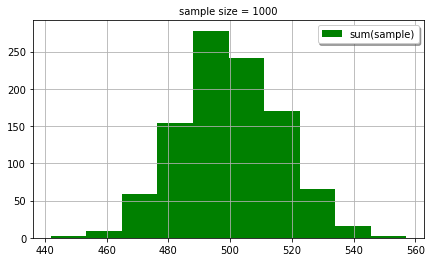

sample size = 2000
mean = 1000.023
var = 457.714471


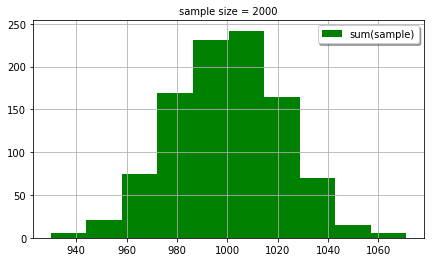

sample size = 3000
mean = 1498.961
var = 804.203479


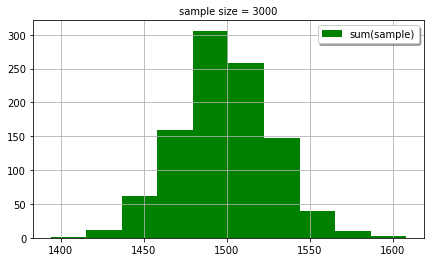

sample size = 4000
mean = 2000.346
var = 1105.660284


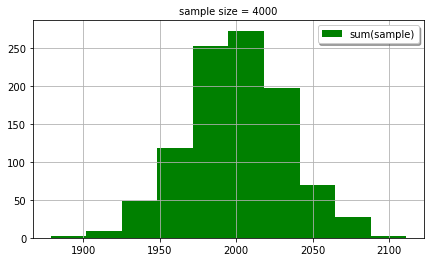

sample size = 5000
mean = 2500.232
var = 1190.722176


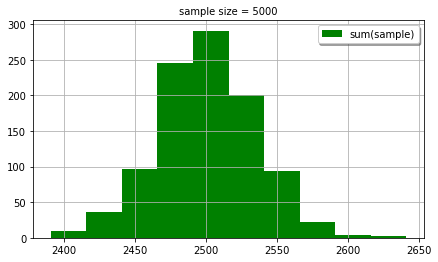

In [ ]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_matrix[i]))
    print('var =', np.var(sample_sum_matrix[i]))
    plot_hist(array=sample_sum_matrix[i], label='sum(sample)', title='sample size = ' + str(n))

## sum(sample) / n^(1/2)

In [ ]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_sqrt_matrix[i]))
    print('var =', np.var(sample_sum_sqrt_matrix[i]))
    plot_hist(array=sample_sum_sqrt_matrix[i], label='sum(sample) / n^(1/2)', title='sample size = ' + str(n))

## sum(sample) / n

In [ ]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_bar_n_matrix[i]))
    print('var =', np.var(sample_bar_n_matrix[i]))
    plot_hist(array=sample_bar_n_matrix[i], label='sum(sample) / n', title='sample size = ' + str(n))

## sum(sample) / n^2

In [ ]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_2_matrix[i]))
    print('var =', np.var(sample_sum_2_matrix[i]))
    plot_hist(array=sample_sum_2_matrix[i], label='sum(sample) / n**2', title='sample size = ' + str(n))

## Central limit Theorem

In [ ]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(CLT_matrix[i]))
    print('var =', np.var(CLT_matrix[i]))
    plot_hist(array=CLT_matrix[i], label='Central limit Theorem ', title='sample size = ' + str(n))